In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
titanic = pd.read_csv("Data/train.csv")

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
survived_dict = {0: "Dead", 1: "Alived"}
titanic["Survived"] = titanic["Survived"].map(survived_dict)

In [93]:
class_dict = {1: "First Class", 2: "Second Class", 3: "Third Class"}
titanic["Pclass"] = titanic["Pclass"].map(class_dict)

In [94]:
embarked_dict = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
titanic["Embarked"] = titanic["Embarked"].map(embarked_dict)

In [106]:
survived_sex = pd.crosstab(titanic["Survived"], titanic["Sex"]).reset_index()

Sex,Survived,female,male
0,Alived,233,109
1,Dead,81,468


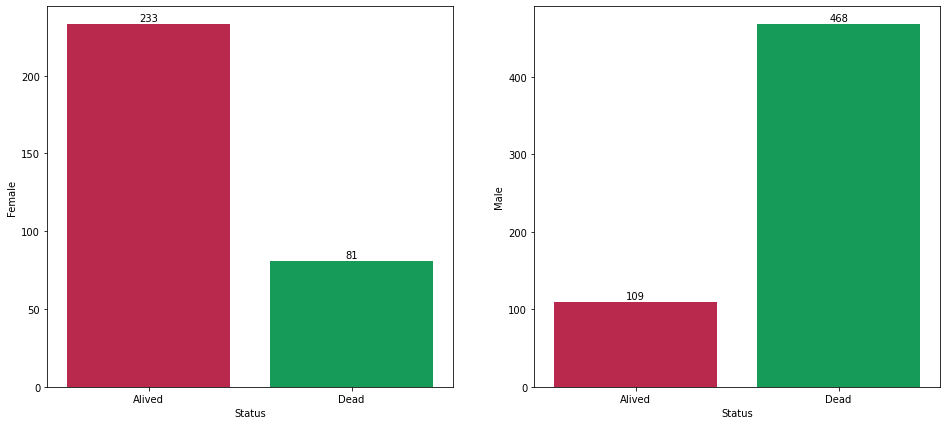

In [122]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
# Female Survived
survived_female = sns.barplot(x = survived_sex["Survived"], y = "female", data= survived_sex,
                       palette = ['#D11141', '#00B159'],ax = axis[0])
for p in survived_female.patches:
    height = p.get_height().round(2)
    text = str(int(height))
    survived_female.text(p.get_x()+p.get_width()/2,height + 2,text, ha="center")
survived_female.set_xlabel("Status")
survived_female.set_ylabel("Female")
# Male Survived
survived_male = sns.barplot(x = survived_sex["Survived"], y = "male", data= survived_sex,
                       palette = ['#D11141', '#00B159'],ax = axis[1])
for p in survived_male.patches:
    height = p.get_height().round(2)
    text = str(int(height))
    survived_male.text(p.get_x()+p.get_width()/2,height + 4,text, ha="center")
survived_male.set_xlabel("Status")
survived_male.set_ylabel("Male")
plt.show()